In [1]:
import re
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext
import numpy as np

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


In [2]:
data = sqlContext.read.parquet('../data/sri/2019-09/reports/06_sri_per_host_and_target_protocol').toPandas()

In [3]:
data['percentage'] = data['sri'] / data['sri'].sum() * 100

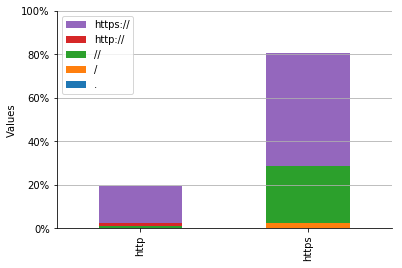

In [26]:
ax = data.pivot(index='host', columns='target', values='percentage').plot.bar(stacked=True, label=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

plt.ylim(0, 100)
plt.legend(title=None)
plt.xlabel('')
plt.ylabel('Values')

ax.set_yticklabels('{}%'.format(int(y)) for y in ax.get_yticks())

handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels))

plt.savefig('06_sri_per_host_and_target_protocol.pdf', bbox_inches='tight')

In [27]:
['{}%'.format(y) for y in ax.get_yticks()]

['0.0%', '20.0%', '40.0%', '60.0%', '80.0%', '100.0%']